In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df = pd.merge(athletes,regions,on = "NOC")

In [6]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [11]:
df.shape

(269382, 17)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace = True)

In [19]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9303
Height     58726
Weight     61437
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region        21
notes     264347
dtype: int64

In [18]:
df["Medal"].unique()

array(['No_Medal', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [17]:
df.fillna({"Medal" : "No_Medal"} , inplace = True)

In [20]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal,Netherlands,NaN


In [21]:
df["Season"].value_counts()

Season
Summer    220818
Winter     48564
Name: count, dtype: int64

In [23]:
summer = df[df["Season"] == "Summer"]
winter = df[df["Season"] == "Winter"]

In [24]:
summer.shape

(220818, 17)

In [25]:
winter.shape

(48564, 17)

#### 1. Season-Wise Medal Tally

In [43]:
medal_counts_summer = summer.groupby(["NOC","Medal"]).size().reset_index(name="count")

In [44]:
medal_counts_summer

,NOC,Medal,count
0,AFG,Bronze,2
1,AFG,No_Medal,75
2,AHO,No_Medal,58
3,AHO,Silver,1
4,ALB,No_Medal,57
...,...,...,...
568,ZAM,Silver,1
569,ZIM,Bronze,1
570,ZIM,Gold,3
571,ZIM,No_Medal,204


In [50]:
medal_pivot_summer = medal_counts_summer.pivot(index="NOC" , columns="Medal" , values="count").fillna(0)

In [45]:
medal_pivot_summer

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
AFG,2,0,124,0,2
AHO,0,0,73,1,1
ALB,0,0,63,0,0
ALG,8,5,522,4,17
AND,0,0,53,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,92,130,1659,161,383


In [51]:
medal_pivot_summer = medal_pivot_summer.astype(int)

In [52]:
medal_pivot_summer

Medal,Bronze,Gold,No_Medal,Silver
NOC,,,,
AFG,2,0,75,0
AHO,0,0,58,1
ALB,0,0,57,0
ALG,7,4,359,1
AND,0,0,45,0
...,...,...,...,...
YEM,0,0,32,0
YMD,0,0,5,0
YUG,24,19,608,27


In [53]:
medal_pivot_summer["Total_Medal"] = medal_pivot_summer[["Gold","Silver","Bronze"]].sum(axis=1)

In [54]:
medal_pivot_summer

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
AFG,2,0,75,0,2
AHO,0,0,58,1,1
ALB,0,0,57,0,0
ALG,7,4,359,1,12
AND,0,0,45,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,24,19,608,27,70


In [55]:
medal_pivot_summer.sort_values(by=["Gold","Silver","Bronze"], ascending = False).head(30)

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
USA,371,622,3037,398,1391
URS,179,279,873,206,664
GBR,202,182,3157,207,591
GER,207,177,2093,186,570
FRA,212,163,3071,166,541
CHN,99,161,1311,105,365
ITA,157,154,2545,148,459
HUN,134,123,2116,118,375
GDR,90,112,474,74,276


In [42]:
summer.shape

(98657, 17)

In [41]:
summer = summer.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event"])

In [56]:
winter = winter.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event"])

In [57]:
winter.shape

(16956, 17)

In [58]:
medal_counts_winter = winter.groupby(["NOC","Medal"]).size().reset_index(name="count")

In [59]:
medal_pivot_winter = medal_counts_winter.pivot(index="NOC" , columns="Medal", values="count").fillna(0)

In [60]:
medal_pivot_winter = medal_pivot_winter.astype(int)

In [62]:
medal_pivot_winter["Total_Medal"] = medal_pivot_winter[["Gold","Silver","Bronze"]].sum(axis=1)

In [63]:
medal_pivot_winter.sort_values(by=["Gold","Silver","Bronze"], ascending = False).head(30)

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
NOR,48,58,529,43,149
URS,24,46,216,24,94
CAN,25,43,770,34,102
USA,44,39,894,48,131
GER,36,39,534,38,113
RUS,21,28,388,22,71
SWE,31,23,560,22,76
AUT,24,21,594,31,76
ITA,25,19,739,17,61


### COUNTRY-WISE MEDAL TALLY

In [65]:
medal_pivot_summer

Medal,Bronze,Gold,No_Medal,Silver,Total_Medal
NOC,,,,,
AFG,2,0,75,0,2
AHO,0,0,58,1,1
ALB,0,0,57,0,0
ALG,7,4,359,1,12
AND,0,0,45,0,0
...,...,...,...,...,...
YEM,0,0,32,0,0
YMD,0,0,5,0,0
YUG,24,19,608,27,70


In [72]:
def fetch_noc(noc,pivot_table):
    if noc in pivot_table.index:
        details ={
            "Gold" : pivot_table.loc[noc,"Gold"],
            "Silver" : pivot_table.loc[noc,"Silver"],
            "Bronze" : pivot_table.loc[noc,"Bronze"],
            "Total Medal" : pivot_table.loc[noc,"Total_Medal"]
        }
        return details
    else:
        print("No NOC exist")

In [74]:
fetch_noc("IND",medal_pivot_summer)

{'Gold': 9, 'Silver': 6, 'Bronze': 11, 'Total Medal': 26}

### YEAR_WISE SEARCH

In [76]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No_Medal,Netherlands,NaN


In [77]:
summer.shape

(98657, 17)

In [78]:
summer.isnull().sum()

ID            0
Name          0
Sex           0
Age        3119
Height    17827
Weight    18182
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region       20
notes     96593
dtype: int64

In [79]:
summer.dropna(subset=["region"],inplace = True)

In [80]:
summer.shape

(98637, 17)

In [81]:
medals_count = summer.groupby(["Year","region","Medal"]).size().unstack(fill_value=0)

In [82]:
medals_count

Medal                         Bronze  Gold  No_Medal  Silver
Year region                                                 
1896 Australia                     1     2         2       0
     Austria                       2     2         3       1
     Denmark                       3     1         6       2
     France                        2     1        11       4
     Germany                       1     4        21       1
...                              ...   ...       ...     ...
2016 Virgin Islands, British       0     0         4       0
     Virgin Islands, US            0     0         7       0
     Yemen                         0     0         3       0
     Zambia                        0     0         7       0
     Zimbabwe                      0     0        13       0

[2769 rows x 4 columns]

In [83]:
medals_count = medals_count.reset_index()

In [84]:
medals_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver
0,1896,Australia,1,2,2,0
1,1896,Austria,2,2,3,1
2,1896,Denmark,3,1,6,2
3,1896,France,2,1,11,4
4,1896,Germany,1,4,21,1
...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0
2765,2016,"Virgin Islands, US",0,0,7,0
2766,2016,Yemen,0,0,3,0
2767,2016,Zambia,0,0,7,0


In [85]:
medals_count["Total_Medal"] = medals_count["Gold"] +medals_count["Silver"] +medals_count["Bronze"]

In [86]:
medals_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver,Total_Medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [99]:
def plot_medals(year, country, df):

    filtered_df = df[(df["Year"]==year) & (df["region"]==country)]
    gold = filtered_df["Gold"].values[0]
    silver = filtered_df["Silver"].values[0]
    bronze = filtered_df["Bronze"].values[0]
    total_medal = filtered_df["Total_Medal"].values[0]
    
    fig,ax = plt.subplots()
    medals = ["Gold","Silver","Bronze","Total_Medals"]
    count = [gold,silver,bronze,total_medal]
    ax.bar(medals,count,color=["gold","silver","brown","green"])
    plt.show()

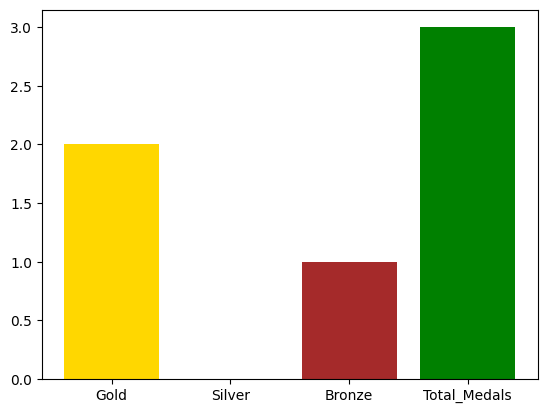

In [100]:
plot_medals(1896,"Australia",medals_count)

### YEAR WISE PROGRESS OF A COUNTRY

In [101]:
medals_count

Medal,Year,region,Bronze,Gold,No_Medal,Silver,Total_Medal
0,1896,Australia,1,2,2,0,3
1,1896,Austria,2,2,3,1,5
2,1896,Denmark,3,1,6,2,6
3,1896,France,2,1,11,4,7
4,1896,Germany,1,4,21,1,6
...,...,...,...,...,...,...,...
2764,2016,"Virgin Islands, British",0,0,4,0,0
2765,2016,"Virgin Islands, US",0,0,7,0,0
2766,2016,Yemen,0,0,3,0,0
2767,2016,Zambia,0,0,7,0,0


In [124]:
def plot_year_progress(country, df):
    filtered_df = df[df["region"]== country]
    fig,ax = plt.subplots()
    ax.plot(filtered_df["Year"], filtered_df["Gold"], color ="gold", label="GOLD", marker = "o" , linestyle ="-")
    ax.plot(filtered_df["Year"], filtered_df["Silver"], color ="silver", label="SILVER",marker = "o" , linestyle ="-")
    ax.plot(filtered_df["Year"], filtered_df["Bronze"], color ="brown", label="BRONZE",marker = "o" , linestyle ="-")
    ax.plot(filtered_df["Year"], filtered_df["Total_Medal"], color ="green", label="TOTAL MEDALS",marker = "o" , linestyle ="-")
    ax.legend()
    plt.show()

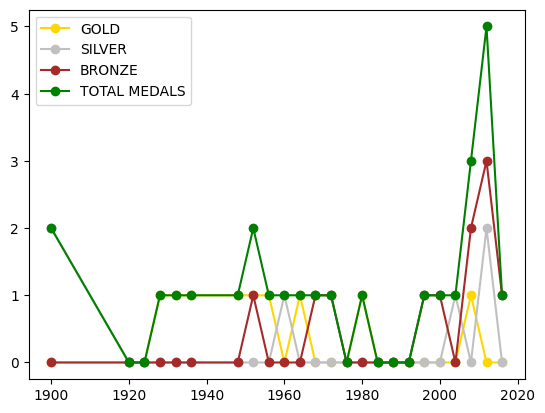

In [125]:
plot_year_progress("India",medals_count)